<a href="https://colab.research.google.com/github/ChaconLima/mestrado/blob/introdu%C3%A7%C3%A3o-a-meta-heuristica/Projeto_1_Introdu%C3%A7%C3%A3o_a_Meta_Heuristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Introdução à Meta-Heurística - Projeto 1</b>

### Descrição do Problema:
A Voe Bem precisa decidir a quantidade de querosene para combustível de seus jatos que adquire de 3 companhias vendedoras. Seus jatos são regularmente abastecidos nos aeroportos de Congonhas, Viracopos, Galeão e Pampulha. As companhias vendedoras poderão fornecer no próximo mês as seguintes quantidades de combustível:

<br>

| Companhia | Galões [litros] |
| ------------- | ------------- |
| Companhia 1  | 250.000 |
| Companhia 2  | 500.000 |
| Companhia 1| 600.000 |

Total ofertado é de 1350.000 [L]

<br>

As necessidade em cada aeroporto é dada por:

<br>

| Aeroporto | Galões [litros] |
| ------------- | ------------- |
| Congonhas  | 100.000 |
| Viracopos  |200.000 |
| Galeão | 300.000 |
| Pampulha | 400.000 |

Total demandado é de 1000.000 [L]

<br>

O custo por galão, incluindo o preço do transporte (em R$/Litro), de cada companhia para cada aeroporto é dado por:

<br>

| Aeroporto | Companhia 1 |Companhia 2 |Companhia 3 |
| ------------- | ------------- | ------------- | ------------- |
| Congonhas  |12|9|10| 
| Viracopos  |10|11|14
| Galeão |  8 |11|13|
| Pampulha |  11|13|9|

Formule o problema de programação linear e obtenha sua solução

# <b> Modelagem Matemático para o Problema </b>

<!-- min z = sum from i = 1 to m sum from j = 1 to n c_{i,j} x_{i,j} ~~~~(1,0)newline
s.a.:~sum from j=1 to n x_{i,j} = f_{i} ~~forall i = {1,...,m} ~~~~(1.1)newline
sum from i = 1 to m x_{i,j} = d_{j} ~ forall j = {1,...,n} ~~~~(1.2)newline
x_{i,j}>= 0 ~forall i={1,...,m} ~ j={1,...,n} ~~(1.3)newline -->

### Variáveis de Decisão:

  - <i>X_i,j</i>-> Quantidade de produtos transportado do fornecedor <i>i</i> para suprir a demanda do cliente <i>j</i>;

### Modelagem Matemática: 

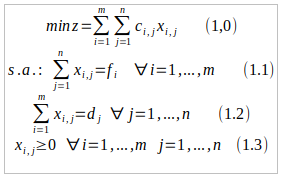

Onde:
- <i>i</i> -> Número de fornecedores,<i> i = 1 ... m</i>;
- <i>j</i> -> Número de clientes,<i> j = 1 ... n</i>;
- <i>C_i,j</i> -> Custo de transporte para trasladar o produto do fornecedor <i>i</i> para suprir a demanda do cliente  <i>j</i>;
- <i>f_i</i> -> Quantidade de produtos ofertados pelo fornecedor <i>i</i>;
- <i>d_i</i> -> Quantidade de produtos demandado pelo cliente <i>j</i>;
- Equação 1.0 -> Representa a função objetivo de minimização, tendo a multiplicação das variáveis de decisão <i>X_i,j</i> pelo custo <i>C_i,j</i>;
- Equação 1.1 -> Restrição das capacidades dos fornecedores, sendo que, o somatório dos clientes <i>j</i>, tem que ser igual à oferta do fornecedor <i>i</i>;
- Equação 1.2 -> Restrição das demandas dos clientes, sendo que, o somatório das ofertas dos fornecedores <i>i</i>, tem que ser igual à demanda do cliente<i> j</i>; e
- Equação 1.3 -> restrição de não negatividade das variáveis de decisão  <i>X_i,j</i>;





# <b> Implementação </b>

Será implementado a modelagem matemática em python, utilizando a library Google OR-Tools.

Instalação do conforme a documentação: https://developers.google.com/optimization/install?hl=pt-br

In [60]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
#################################################################################################
# library Transport Solver Problem - Copyright 2023 Mateus Chacon

# Este programa é um software livre, você pode redistribuí-lo e/ou modificá-lo 
# sob os termos da Licença Pública Geral GNU como publicada pela Fundação do Software Livre (FSF), 
# na versão 3 da Licença, ou (a seu critério) qualquer versão posterior.

# Este programa é distribuído na esperança de que possa ser útil, mas SEM NENHUMA GARANTIA, 
# e sem uma garantia implícita de ADEQUAÇÃO a qualquer MERCADO ou APLICAÇÃO EM PARTICULAR. 

# Veja a Licença Pública Geral GNU para mais detalhes <http://www.gnu.org/licenses/>
#################################################################################################

from ortools.linear_solver import pywraplp

class ProblemInformation:
  def __init__(self, costs=[], offers=[], demands=[]):
        self.costs = costs
        self.offers = offers
        self.demands = demands
        self.supplierNames = []
        self.customerNames = []
        self.namesDefault()

  def namesDefault(self):
    for i in range(self.getSupplierSize()):
      self.supplierNames.append("Fabrica "+str(i+1))
    for i in range(self.getCustomerSize()):
      self.customerNames.append("Mercado "+str(i+1))

  def getSupplierSize(self):
    return len(self.offers)

  def getCustomerSize(self):
    return len(self.demands);

  def addSupplierNames(self, names = []):
    self.supplierNames = names
  
  def addCustomerNames(self, names = []):
    self.customerNames = names
  
  def toString(self):
    print("Custos: ", self.costs)
    print("Ofertas: ", self.supplierNames, self.offers)
    print("Demandas: ", self.customerNames, self.demands)

class TransportSolverProblem:
  
  def __init__(self, data=ProblemInformation):
    self.data = data
    self.solver = pywraplp.Solver('Modelo de Transporte', pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)
    self.x = {}
    
  def balancingSupplyAndDemand(self):

    ofertsT = 0
    for i in range(self.data.getSupplierSize()):
      ofertsT += self.data.offers[i]

    demandsT = 0
    for j in range(self.data.getCustomerSize()):
      demandsT += self.data.demands[j]

    if(ofertsT > demandsT):
      print("Oferta total é maior que a demanda total, então será criado um cliente fantasma para ficar com o excedente")
      self.data.demands.append(ofertsT-demandsT)
      self.data.customerNames.append("Cliente Fantasma")
      ghostClient = 0
      for i in range(self.data.getSupplierSize()):
        self.data.costs[i].append(ghostClient)
      
    elif(demandsT > ofertsT):
      print("Demanda total é maior que a oferta total, então será criado um fornecedor fantasma para ficar com o faltante")
      self.data.offers.append(demandsT-ofertsT)
      self.data.supplierNames.append("Fornecedor Fantasma")
      ghostSupplier = []
      for j in range(self.data.getCustomerSize()):
        ghostSupplier.append(0)
      self.data.costs.append(ghostSupplier)

    elif(demandsT == ofertsT):
      print("Modelo balanceado")

  def createsDecisionVariable(self):
    for i in range(self.data.getSupplierSize()):
      for j in range(self.data.getCustomerSize()):
        self.x[i,j] = self.solver.NumVar(0, self.solver.infinity(), '')

  def createsObjectiveFunction(self):
    objective_terms = []
    for i in range(self.data.getSupplierSize()):
      for j in range(self.data.getCustomerSize()):
        objective_terms.append(self.data.costs[i][j] * self.x[i, j])
    self.solver.Minimize(self.solver.Sum(objective_terms))
  
  def createsRestrictionsSuppliers(self):
    for i in range(self.data.getSupplierSize()):
      self.solver.Add(self.solver.Sum([self.x[i, j] for j in range(self.data.getCustomerSize())]) == self.data.offers[i],name='RFabricas '+str(i))

  def createsRestrictionsCustomers(self):
    for j in range(self.data.getCustomerSize()):
      self.solver.Add(self.solver.Sum([self.x[i, j] for i in range(self.data.getSupplierSize())]) == self.data.demands[j],name='RMercado '+str(j))

  def generateReport(self):
      print('\nCusto total = ', self.solver.Objective().Value(), '\n')
      for i in range(self.data.getSupplierSize()):
        for j in range(self.data.getCustomerSize()):
            # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
            if self.x[i, j].solution_value() > 0.01:
              print('Fluxo do(a) '+self.data.supplierNames[i]+' para o(a) '+self.data.customerNames[j]+':\tFluxo = % 8.2f, \tCusto = %.2f' % 
                    (self.x[i, j].solution_value(), self.data.costs[i][j]))

  def execute(self):
    self.balancingSupplyAndDemand()
    self.createsDecisionVariable()
    self.createsObjectiveFunction()
    self.createsRestrictionsCustomers()
    self.createsRestrictionsSuppliers()
    status = self.solver.Solve()

    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
      self.generateReport()
    else:
      print("Erro na execução do Solver")


# <b> Resultados da otimização do problema </b>

### Utilização de uma interface para imputar os dados

In [66]:
# Dados extraídos de uma interface. 
Custos = "12,10,8,11;9,11,11,13;10,14,13,9"#@param {type:"string"}
Fornecedores = "250000, 500000, 600000"#@param {type:"string"}
Demandas = "100000, 200000, 300000, 400000"#@param {type:"string"}

Nomes_Fornecedores = "Companhia 1, Companhia 2 , Companhia 3"#@param {type:"string"}
Nomes_Clientes = "Congonhas,Viracopos,Gale\xE3o,Pampulha"#@param {type:"string"}

def converterArrayStringInArrayFloat(stringList = []):
  return [float(stringList[j]) for j in range(len(stringList))]

costs = []
line = Custos.split(';')
for i in range(len(line)):
  column = line[i].split(',')
  costs.append(converterArrayStringInArrayFloat(column))

line = Fornecedores.split(',')
f = converterArrayStringInArrayFloat(line)

line = Demandas.split(',')
d = converterArrayStringInArrayFloat(line)

f_n = Nomes_Fornecedores.split(',')
d_n = Nomes_Clientes.split(',')

data = ProblemInformation(costs,f,d)
data.addCustomerNames(d_n)
data.addSupplierNames(f_n)

solver = TransportSolverProblem(data)
solver.execute()


Oferta total é maior que a demanda total, então será criado um cliente fantasma para ficar com o excedente

Custo total =  9250000.0 

Fluxo do(a) Companhia 1 para o(a) Galeão:	Fluxo =  250000.00, 	Custo = 8.00
Fluxo do(a)  Companhia 2  para o(a) Congonhas:	Fluxo =  100000.00, 	Custo = 9.00
Fluxo do(a)  Companhia 2  para o(a) Viracopos:	Fluxo =  200000.00, 	Custo = 11.00
Fluxo do(a)  Companhia 2  para o(a) Galeão:	Fluxo =  50000.00, 	Custo = 11.00
Fluxo do(a)  Companhia 2  para o(a) Cliente Fantasma:	Fluxo =  150000.00, 	Custo = 0.00
Fluxo do(a)  Companhia 3 para o(a) Pampulha:	Fluxo =  400000.00, 	Custo = 9.00
Fluxo do(a)  Companhia 3 para o(a) Cliente Fantasma:	Fluxo =  200000.00, 	Custo = 0.00


### Utilização diretamente no código para imputar os dados

In [67]:
costs = [[12,10,8,11],[9,11,11,13],[10,14,13,9]]
f = [250000, 500000, 600000]
d = [100000, 200000, 300000, 400000]
f_n = ["Companhia 1","Companhia 2","Companhia 3"]
d_n = ["Congonhas","Viracopos","Galeão","Pampulha"]

data = ProblemInformation(costs,f,d)
data.addCustomerNames(d_n)
data.addSupplierNames(f_n)

solver = TransportSolverProblem(data)
solver.execute()

Oferta total é maior que a demanda total, então será criado um cliente fantasma para ficar com o excedente

Custo total =  9250000.0 

Fluxo do(a) Companhia 1 para o(a) Galeão:	Fluxo =  250000.00, 	Custo = 8.00
Fluxo do(a) Companhia 2 para o(a) Congonhas:	Fluxo =  100000.00, 	Custo = 9.00
Fluxo do(a) Companhia 2 para o(a) Viracopos:	Fluxo =  200000.00, 	Custo = 11.00
Fluxo do(a) Companhia 2 para o(a) Galeão:	Fluxo =  50000.00, 	Custo = 11.00
Fluxo do(a) Companhia 2 para o(a) Cliente Fantasma:	Fluxo =  150000.00, 	Custo = 0.00
Fluxo do(a) Companhia 3 para o(a) Pampulha:	Fluxo =  400000.00, 	Custo = 9.00
Fluxo do(a) Companhia 3 para o(a) Cliente Fantasma:	Fluxo =  200000.00, 	Custo = 0.00


# <b> Outros Exemplos de utilização da library Criada </b>



In [68]:
# Dados do Exemplo da aula PO240-A25:
costs = [[25, 20, 30],[30, 25, 25],[20, 15, 23]]
f = [2000, 3000, 1500]
d = [2000, 2000, 1000]

data = ProblemInformation(costs,f,d)
solver = TransportSolverProblem(data)
solver.execute()

Oferta total é maior que a demanda total, então será criado um cliente fantasma para ficar com o excedente

Custo total =  110000.0 

Fluxo do(a) Fabrica 1 para o(a) Mercado 2:	Fluxo =  2000.00, 	Custo = 20.00
Fluxo do(a) Fabrica 2 para o(a) Mercado 1:	Fluxo =   500.00, 	Custo = 30.00
Fluxo do(a) Fabrica 2 para o(a) Mercado 3:	Fluxo =  1000.00, 	Custo = 25.00
Fluxo do(a) Fabrica 2 para o(a) Cliente Fantasma:	Fluxo =  1500.00, 	Custo = 0.00
Fluxo do(a) Fabrica 3 para o(a) Mercado 1:	Fluxo =  1500.00, 	Custo = 20.00


In [69]:
# Dados do Exemplo da aula PO240-A25, alterados:
costs = [[25, 20, 30],[30, 25, 25],[20, 15, 23]]
d = [2000, 3000, 1500]
f = [2000, 2000, 1000]

data = ProblemInformation(costs,f,d)
solver = TransportSolverProblem(data)
solver.execute()

Demanda total é maior que a oferta total, então será criado um fornecedor fantasma para ficar com o faltante

Custo total =  107500.0 

Fluxo do(a) Fabrica 1 para o(a) Mercado 2:	Fluxo =  2000.00, 	Custo = 20.00
Fluxo do(a) Fabrica 2 para o(a) Mercado 1:	Fluxo =   500.00, 	Custo = 30.00
Fluxo do(a) Fabrica 2 para o(a) Mercado 3:	Fluxo =  1500.00, 	Custo = 25.00
Fluxo do(a) Fabrica 3 para o(a) Mercado 2:	Fluxo =  1000.00, 	Custo = 15.00
Fluxo do(a) Fornecedor Fantasma para o(a) Mercado 1:	Fluxo =  1500.00, 	Custo = 0.00
